# Part 2

**Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle
import matplotlib.pyplot as plt
import seaborn as sc

In [2]:
data_2=pd.read_csv('../Assignment_1/datasets/diamond.csv')
df2=pd.DataFrame(data_2)
df2=df2.drop(df2.columns[0],axis=1)
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


These are the main statistics before the pre processing of the emissions of country


In [3]:
df2['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [4]:
df2=df2.dropna(axis=0)
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df2['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [6]:
df2['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [7]:
df2.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


{'bodies': [<matplotlib.collections.PolyCollection at 0x7ff260db1b80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ff260dbdd00>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ff2c0698310>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ff2c06986d0>}

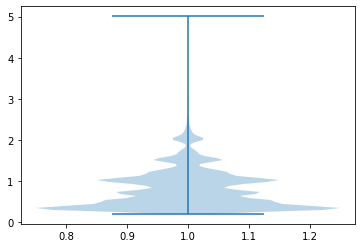

In [8]:
plt.violinplot(df2['carat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2b2067550>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2b2067bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2b2067280>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2b20780d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2b20783a0>],
 'means': []}

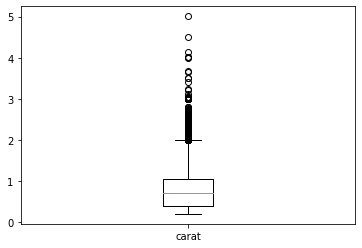

In [9]:
plt.boxplot(df2['carat'],labels=['carat'])

<AxesSubplot:xlabel='carat', ylabel='price'>

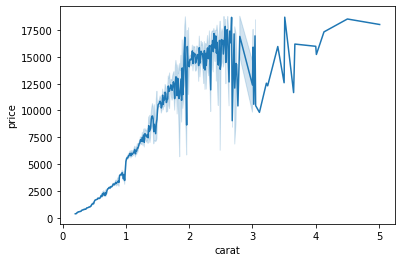

In [10]:
sc.lineplot(data=df2,x='carat',y='price')

<AxesSubplot:xlabel='price'>

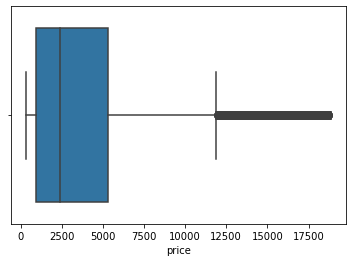

In [11]:
sc.boxplot(df2['price'])

<AxesSubplot:xlabel='price', ylabel='color'>

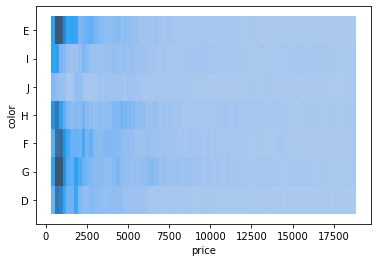

In [12]:
sc.histplot(x='price',y='color',data=df2)

<AxesSubplot:xlabel='carat', ylabel='Count'>

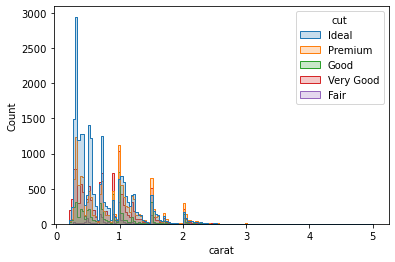

In [13]:
sc.histplot(x='carat',hue='cut',data=df2,element='step')

<AxesSubplot:xlabel='price', ylabel='clarity'>

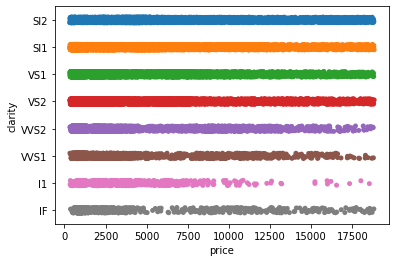

In [14]:
sc.stripplot(data=df2,x='price',y='clarity')

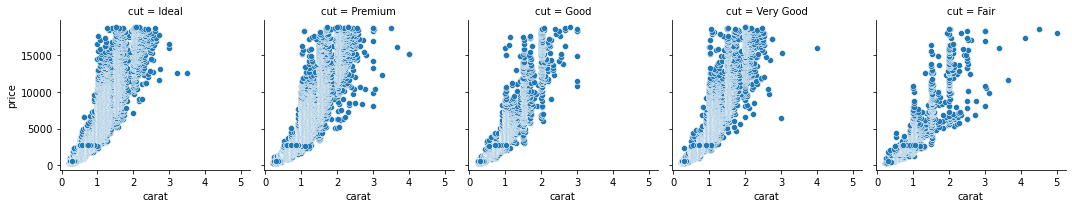

In [15]:
g=sc.FacetGrid(df2,col='cut')
g.map_dataframe(sc.scatterplot,x='carat',y='price')

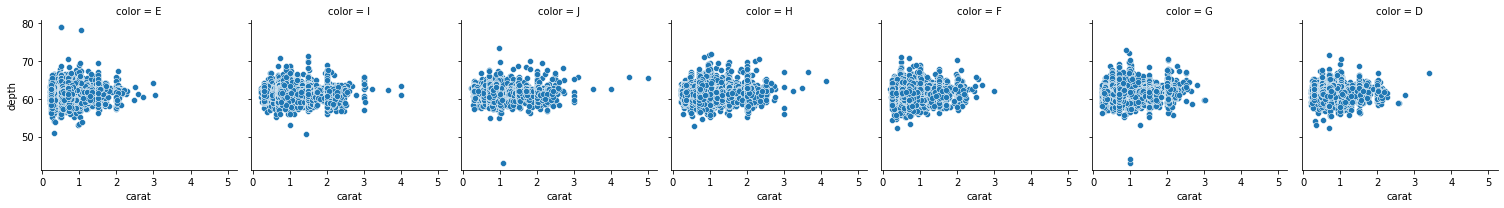

In [16]:
g=sc.FacetGrid(df2,col='color')
g.map_dataframe(sc.scatterplot,x='carat',y='depth')

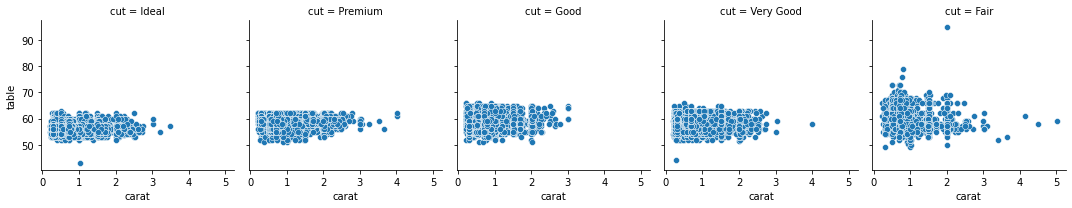

In [17]:
g=sc.FacetGrid(df2,col='cut')
g.map_dataframe(sc.scatterplot,x='carat',y='table')

In [18]:
columns=['carat','table','depth','x','y','z','price']
for c in columns:
    mini=df2[c].min()
    maxi=df2[c].max()
    df2[c]=(df2[c]-mini)/(maxi-mini)
df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


In [19]:
Y=df2['price']
X=df2.drop('price',axis=1)
X=pd.get_dummies(X)
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [20]:
X_train=X.sample(frac=0.8)
X_test=X.drop(X_train.index)
Y_train=Y.drop(X_test.index)
Y_test=Y.drop(Y_train.index)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.size)
print(Y_test.size)

(43152, 26)
(10788, 26)
43152
10788


The training set contains 26 features of size 43152 entries whereas the testing set contains 10788 entries.

Now calculating weights using Ordinary least square equation:
$$w=(X^TX)^{-1}X^Ty$$

In [22]:
first_mul=np.matmul(np.transpose(X_train),X_train)
inv=np.linalg.inv(first_mul)
ans=np.matmul(np.matmul(inv,np.transpose(X_train)),Y_train)

In [23]:
ans=pd.DataFrame(ans)
ans

,0
0,3.435756e+01
1,8.096976e+01
2,-1.515820e+01
3,4.611271e+02
4,-7.290153e+02
5,-1.752720e+03
6,2.132981e+14
7,2.132981e+14
8,2.132981e+14
9,2.132981e+14


In [24]:
pickle.dump(ans,open( "nikhileswar_assignment_part2.pickle", "wb" ))

# Part 3

**Ridge Regression**

Now calculating weights using Reqularized squared loss equation:

$$J(w)=\frac{1}{N}\Sigma_{i=1}^{N} (y_i-w^Tx_i)^2+\frac{1}{2}\lambda w^Tw$$

$$w=(X^TX+\lambda I)^{-1}X^Ty$$

Next we are going to iterate over various lambda and find the best test accuracy lambda and print it and upload the weights into the pickle file.

In [27]:
for l in range(1,10):
    first_mul=np.matmul(np.transpose(X_train),X_train)
    sec_mul=l*np.identity(X_train.shape[1])
    inv=np.linalg.inv(first_mul+sec_mul)
    ans=np.matmul(np.matmul(inv,np.transpose(X_train)),Y_train)
    y_pred=np.matmul(X_test,ans)
    MSE=((Y_test-y_pred.squeeze())**2).mean()
    if l==1:
        fin_loss=MSE
        final_lambda=l
        final_y_pred=y_pred
        fin_ans=ans
    elif(MSE<fin_loss):
        fin_loss=MSE
        final_lambda=l
        final_y_pred=y_pred 
        fin_ans=ans
print([final_lambda,fin_loss,final_y_pred,fin_ans])

[9, 0.04627348267039616, 0        0.197112
4        0.198899
12       0.196287
13       0.196040
15       0.188219
           ...   
53917    0.200821
53920    0.202773
53922    0.196817
53934    0.194340
53935    0.195043
Length: 10788, dtype: float64, 0    -0.027824
1     0.021571
2     0.074273
3     0.020826
4    -0.000126
5    -0.014550
6     0.063580
7     0.065329
8     0.068805
9     0.064259
10    0.069280
11    0.046817
12    0.047134
13    0.047327
14    0.048138
15    0.046073
16    0.048878
17    0.046886
18    0.038112
19    0.039710
20    0.042231
21    0.046583
22    0.039357
23    0.044154
24    0.042386
25    0.038718
dtype: float64]


The error is 0.047

Text(0, 0.5, 'Y_pred')

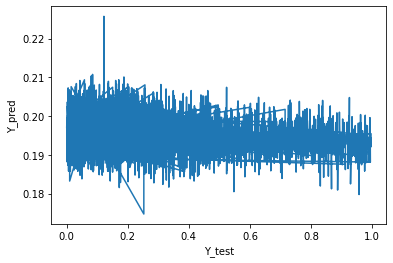

In [26]:
plt.plot(Y_test,final_y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [28]:
pickle.dump(fin_ans,open( "nikhileswar_assignment_part3.pickle", "wb" ))

References : 

1. https://en.wikipedia.org/wiki/Bias_of_an_estimator

2. https://www.ib-net.org/benchmarking-methodologies/performance-benchmarking/statistical-techniques/

3. https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

4. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html